# Limpieza de datos 
Realizado por : Rolando Ortiz Herbas

#  Cargar librerias de trabajo

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

# Cargar el dataset

In [3]:
ruta = "C:/Users/Roland/Documents/UNAD_MEXICO_Matematicas_2022/Semestre_2024_1/ZZZ_Word_y_PT/DatosClientes/Clientes_Dos_Mil.csv"
datasetT = pd.read_csv(ruta)

# Muestra el dataset cargado

In [4]:
print(datasetT.shape)
datasetT.head()

(2000, 31)


,Nocliente,Ocupacion,NoPago,TotalMonto,EstadoContrato,Producto,Plazo,FechaInicioC,FechaAdjudicación,FechaUltimoPago,...,Genero,PersonaTipo,dtEstadoContrato,GrupoOrigenVenta,SemanasAdjud,Pagos9,Domicilia_Pago,Email,timetotV,Y
0,1,Ejecutivo (a),35,302783,Subastado con 013,Autos,60,2015-04-17,2015-04-17,2018-02-21,...,Mujer,Fisica,"Subasta (0,20]",evento,0.0,9,1,1,35,1
1,7601,Coordinador (a),38,211366,Subastado con 012,Autos,60,2015-02-20,2015-02-20,2018-02-08,...,Hombre,Fisica,"Subasta (0,20]",modulo-agencia,0.0,9,1,1,38,1
2,9697,Arquitecto (a),50,323640,Sorteo,Autos,60,2015-02-20,2016-01-15,2019-02-18,...,Mujer,Fisica,Sorteo,modulo-agencia,47.0,8,1,1,50,1
3,12999,Gestor (a),60,377036,Sorteo,Autos,60,2015-04-17,2015-07-17,2020-03-05,...,Mujer,Fisica,Sorteo,modulo-agencia,13.0,9,0,1,60,1
4,201301,Propietario (a),45,392349,Subastado con 013,Autos,60,2015-04-17,2015-04-17,2018-12-26,...,Hombre,Moral,"Subasta (0,20]",modulo-agencia,0.0,9,0,1,45,1


#4 Eliminar columnas que contienen un solo valor

In [5]:
datasetT = datasetT.drop('FechaDEfiniquito', axis=1)
datasetT = datasetT.drop('Plazo', axis = 1)
datasetT.head()

,Nocliente,Ocupacion,NoPago,TotalMonto,EstadoContrato,Producto,FechaInicioC,FechaAdjudicación,FechaUltimoPago,FechaProyectadaFin,...,Genero,PersonaTipo,dtEstadoContrato,GrupoOrigenVenta,SemanasAdjud,Pagos9,Domicilia_Pago,Email,timetotV,Y
0,1,Ejecutivo (a),35,302783,Subastado con 013,Autos,2015-04-17,2015-04-17,2018-02-21,2020-04-17,...,Mujer,Fisica,"Subasta (0,20]",evento,0.0,9,1,1,35,1
1,7601,Coordinador (a),38,211366,Subastado con 012,Autos,2015-02-20,2015-02-20,2018-02-08,2020-02-20,...,Hombre,Fisica,"Subasta (0,20]",modulo-agencia,0.0,9,1,1,38,1
2,9697,Arquitecto (a),50,323640,Sorteo,Autos,2015-02-20,2016-01-15,2019-02-18,2020-02-20,...,Mujer,Fisica,Sorteo,modulo-agencia,47.0,8,1,1,50,1
3,12999,Gestor (a),60,377036,Sorteo,Autos,2015-04-17,2015-07-17,2020-03-05,2020-04-17,...,Mujer,Fisica,Sorteo,modulo-agencia,13.0,9,0,1,60,1
4,201301,Propietario (a),45,392349,Subastado con 013,Autos,2015-04-17,2015-04-17,2018-12-26,2020-04-17,...,Hombre,Moral,"Subasta (0,20]",modulo-agencia,0.0,9,0,1,45,1


# Ver las variables categóricas

In [6]:
# Con data.info() podemos ver las variables categóricas
# (Dtype=object)
datasetT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nocliente           2000 non-null   int64  
 1   Ocupacion           2000 non-null   object 
 2   NoPago              2000 non-null   int64  
 3   TotalMonto          2000 non-null   int64  
 4   EstadoContrato      2000 non-null   object 
 5   Producto            2000 non-null   object 
 6   FechaInicioC        2000 non-null   object 
 7   FechaAdjudicación   2000 non-null   object 
 8   FechaUltimoPago     2000 non-null   object 
 9   FechaProyectadaFin  2000 non-null   object 
 10  MontoVencido        2000 non-null   int64  
 11  Mensualidad         2000 non-null   int64  
 12  Ingresos            1958 non-null   float64
 13  Legal               520 non-null    object 
 14  EdadActual          2000 non-null   int64  
 15  AZULEstatus         2000 non-null   object 
 16  Adjudi

# Identificar valores faltantes

In [7]:
# Identificar valores faltantes
display(datasetT.isnull().sum())

# Si hay valores faltantes, aplicar estrategias de completar valores o eliminación

Nocliente                0
Ocupacion                0
NoPago                   0
TotalMonto               0
EstadoContrato           0
Producto                 0
FechaInicioC             0
FechaAdjudicación        0
FechaUltimoPago          0
FechaProyectadaFin       0
MontoVencido             0
Mensualidad              0
Ingresos                42
Legal                 1480
EdadActual               0
AZULEstatus              0
AdjudicaReal           543
PagosPuntuales           0
CostoAdmin               0
Genero                   0
PersonaTipo              0
dtEstadoContrato         0
GrupoOrigenVenta         0
SemanasAdjud             0
Pagos9                   0
Domicilia_Pago           0
Email                    0
timetotV                 0
Y                        0
dtype: int64

# En este caso y con la información de la tabla anterior del dataset vemos que las columnas
# 'Ingresos' , 'Legal' y 'AdjudicaReal' tienen menos información por lo que la completaremos de
# acuerdo con reglas de negocio de la empresa.

In [8]:
datasetT['Ingresos'] = np.where((datasetT['Ingresos'] == 0) | (datasetT['Ingresos'].isnull()), 
datasetT['Mensualidad'] * 4, datasetT['Ingresos'])


datasetT['Legal'] = np.where((datasetT['Legal'] == 'NA') | (datasetT['Legal'].isnull()), 'Normal', 
datasetT ['Legal'])


datasetT['AdjudicaReal'] = np.where((datasetT['AdjudicaReal'] == 'NA') | (datasetT['AdjudicaReal'].isnull()), 'Normal', datasetT['AdjudicaReal'])

# Ver nuevamente el dataset 

In [9]:
display(datasetT.isnull().sum())

Nocliente             0
Ocupacion             0
NoPago                0
TotalMonto            0
EstadoContrato        0
Producto              0
FechaInicioC          0
FechaAdjudicación     0
FechaUltimoPago       0
FechaProyectadaFin    0
MontoVencido          0
Mensualidad           0
Ingresos              0
Legal                 0
EdadActual            0
AZULEstatus           0
AdjudicaReal          0
PagosPuntuales        0
CostoAdmin            0
Genero                0
PersonaTipo           0
dtEstadoContrato      0
GrupoOrigenVenta      0
SemanasAdjud          0
Pagos9                0
Domicilia_Pago        0
Email                 0
timetotV              0
Y                     0
dtype: int64

# Mostrar Media, desviación estandar, mínimo, máximo, cuartiles

In [10]:
# datasetT.select_dtypes(include=['float64', 'int64']).describe()
desc = datasetT.describe()

# Formatear los números a 8 enteros y 2 decimales
desc_formatted = desc.applymap(lambda x: f"{x:10.2f}")

# Mostrar el DataFrame formateado
print(desc_formatted)

         Nocliente      NoPago  TotalMonto MontoVencido Mensualidad  \
count      2000.00     2000.00     2000.00      2000.00     2000.00   
mean    8427590.03       43.86   281169.04     40908.42     4685.65   
std     1573089.90       13.82   109890.75     70678.81     1831.51   
min           1.00        1.00      662.00         0.00       11.00   
25%     7914221.25       34.00   209467.00         0.00     3491.00   
50%     8712397.00       47.00   282068.50      6709.50     4701.00   
75%     9413125.50       56.00   343684.75     51539.75     5727.50   
max    10115503.00       60.00   842910.00    823746.00    14048.00   

         Ingresos  EdadActual PagosPuntuales  CostoAdmin SemanasAdjud  \
count     2000.00     2000.00        2000.00     2000.00      2000.00   
mean     21725.48       38.63          38.62    19810.54        41.64   
std      12035.48       11.38          13.41     6911.18        29.49   
min       3014.00       10.00           1.00     1571.00         0.0

#  Detectamos valores nulos para corregir el dataset

In [ ]:
# Para la columna ingresos
nulos_Ingresos = datasetT['Ingresos'].isnull().sum()
print(nulos_Ingresos)
datasetT['Ingresos'] = np.where((datasetT['Ingresos'] == 0) | (datasetT['Ingresos'].isnull()), datasetT['Mensualidad'] * 4, datasetT['Ingresos'])

# Para la columna Legal
datasetT['Legal'] = np.where((datasetT['Legal'] == 'NA') | (datasetT['Legal'].isnull()), 'Normal', datasetT['Legal'])

# Para la columna AdjudicaReal
datasetT['AdjudicaReal'] = np.where((datasetT['AdjudicaReal'] == 'NA') | (datasetT['AdjudicaReal'].isnull()), 'Normal', datasetT['AdjudicaReal'])

datasetT.info()

In [ ]:
datasetT.head()

# Determinar estadistica basica del dataset

In [ ]:
descripcion = datasetT.describe()

descripcion_formateada = descripcion.applymap(lambda x: f"{x:10.2f}")

print(descripcion_formateada)

# Limpieza de valores fuera de rango (outliers)
La columna Mensualidad, la cual tiene un valor mínimo 
de 11 pesos. Por lo tanto, estos valores se incrementarán a 2,000 pesos. 
Además, la columna EdadActual presenta un valor mínimo de 10 años. 
Por ello, todos los valores menores de 18 años se ajustarán a 18 años.

In [11]:
datasetT['Mensualidad'] = np.where((datasetT['Mensualidad'] <= 1999) | (datasetT['Mensualidad'].isnull()), 2000, datasetT['Mensualidad'])
     
datasetT['EdadActual'] = np.where((datasetT['EdadActual'] <= 18) | (datasetT['EdadActual'].isnull()), 18, datasetT['EdadActual'])
      

In [12]:
descripcion = datasetT.describe()

descripcion_formateada = descripcion.applymap(lambda x: f"{x:10.2f}")

print(descripcion_formateada)

         Nocliente      NoPago  TotalMonto MontoVencido Mensualidad  \
count      2000.00     2000.00     2000.00      2000.00     2000.00   
mean    8427590.03       43.86   281169.04     40908.42     4720.19   
std     1573089.90       13.82   109890.75     70678.81     1772.27   
min           1.00        1.00      662.00         0.00     2000.00   
25%     7914221.25       34.00   209467.00         0.00     3491.00   
50%     8712397.00       47.00   282068.50      6709.50     4701.00   
75%     9413125.50       56.00   343684.75     51539.75     5727.50   
max    10115503.00       60.00   842910.00    823746.00    14048.00   

         Ingresos  EdadActual PagosPuntuales  CostoAdmin SemanasAdjud  \
count     2000.00     2000.00        2000.00     2000.00      2000.00   
mean     21725.48       38.63          38.62    19810.54        41.64   
std      12035.48       11.37          13.41     6911.18        29.49   
min       3014.00       18.00           1.00     1571.00         0.0

In [13]:
cols_nombres = ['NoPago', 'TotalMonto', 'MontoVencido', 'Mensualidad', 'Ingresos',
           'EdadActual', 'CostoAdmin', 'SemanasAdjud', 'Pagos9', 'Domicilia_Pago',
            'Email', 'timetotV']

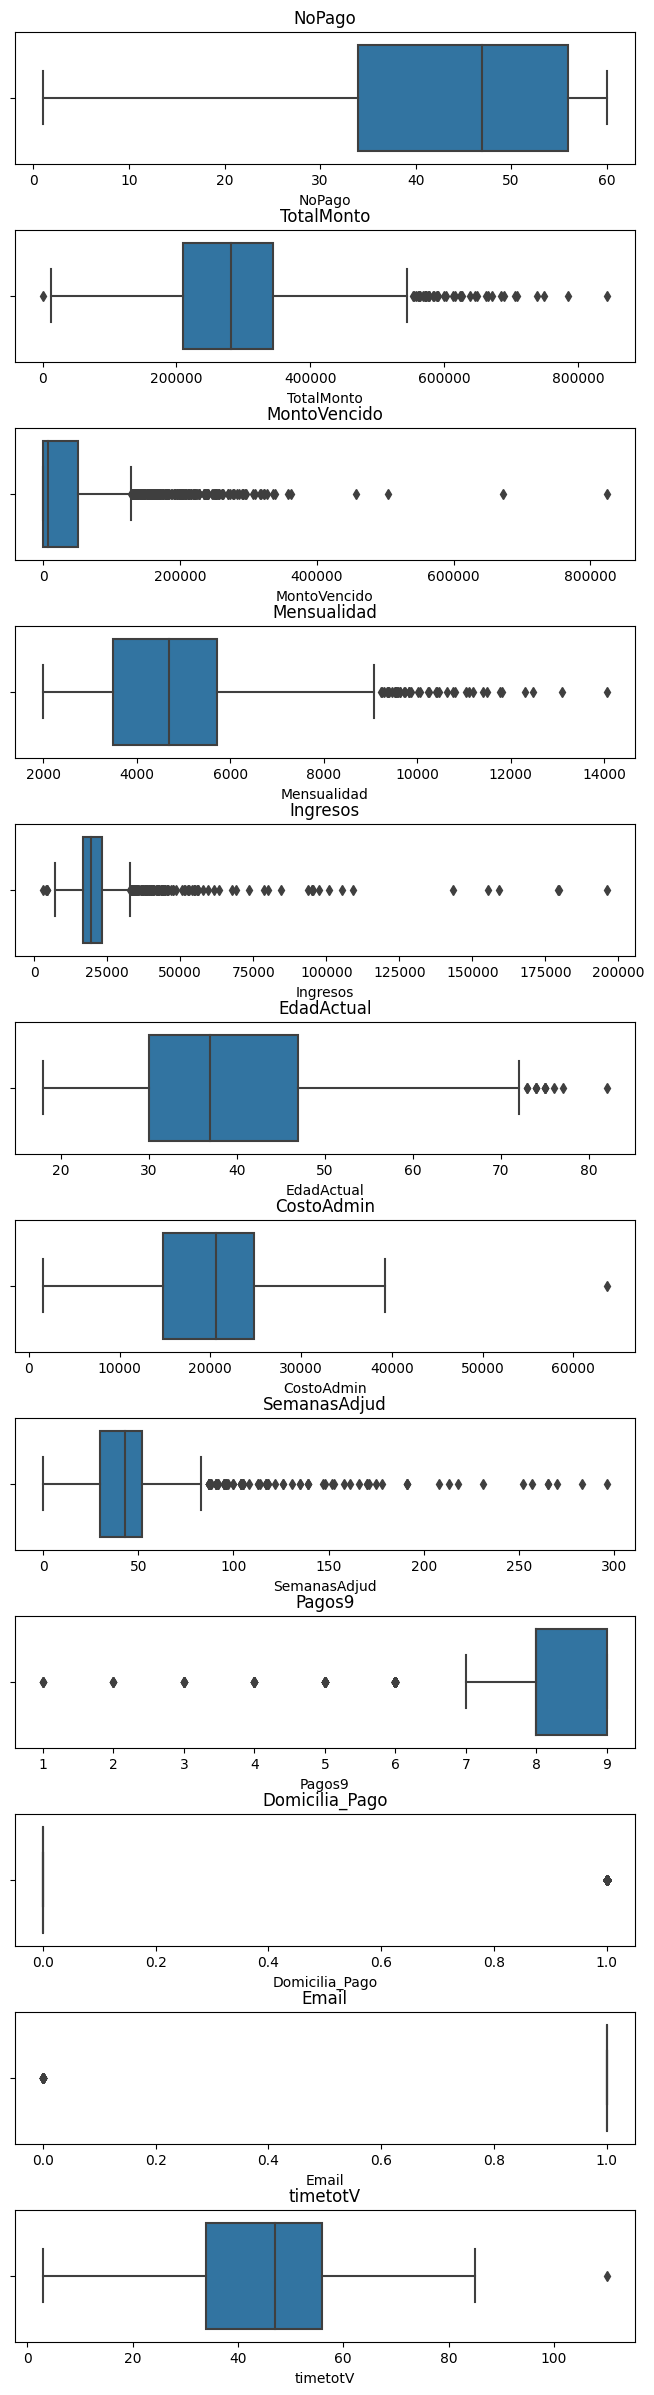

In [14]:
fig, ax = plt.subplots(nrows=12, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)
print(enumerate(cols_nombres))
for i, col in enumerate(cols_nombres):
    sns.boxplot(x=col, data = datasetT, ax=ax[i])
    ax[i].set_title(col)

# Análisis de columnas categóricas

In [15]:
cols_nombres = ['Ocupacion', 'EstadoContrato', 'Producto', 'Legal', 'AZULEstatus',
           'AdjudicaReal', 'Genero', 'PersonaTipo', 'dtEstadoContrato', 'GrupoOrigenVenta']

In [16]:
for col in cols_nombres:
    print(datasetT[col].value_counts())
    print('-'*20)

Propietario (a)      310
Empleado (a)         250
Gerente              116
Comerciante           99
Administrador (a)     74
                    ... 
Presidente (a)         1
Servidor (a)           1
Especialista           1
Contralor (a)          1
Albañil                1
Name: Ocupacion, Length: 127, dtype: int64
--------------------
Automático           819
Sorteo               536
Subastado con 013    290
Subastado con 012    180
Subastado con 014    164
Subastado con 009      4
Subastado con 011      3
Subastado con 015      2
Subastado con 006      1
Subastado con 020      1
Name: EstadoContrato, dtype: int64
--------------------
Autos               1443
Autos 6 &amp; YA     557
Name: Producto, dtype: int64
--------------------
Normal    1480
Legal      520
Name: Legal, dtype: int64
--------------------
Express    1488
Normal      512
Name: AZULEstatus, dtype: int64
--------------------
Automatica         1419
Normal              543
Automatica Plus      38
Name: AdjudicaReal, d

# Corregir tipografia y todo a minusculas

In [17]:
for column in datasetT.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_nombres:
        datasetT[column] = datasetT[column].str.lower()

# Correlaciones 

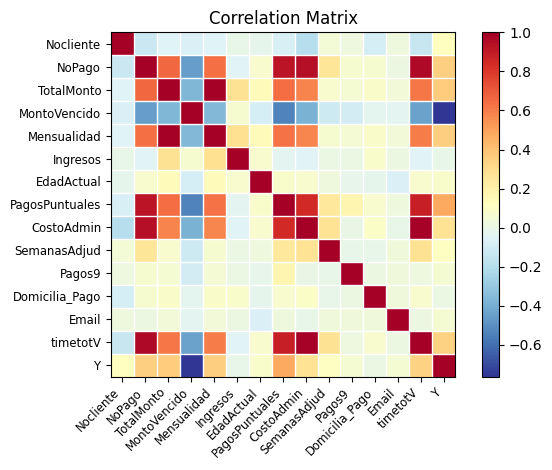

In [18]:
corr = datasetT.set_index('Ocupacion').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

# Guardar el dataset en un archivo CSV

In [ ]:
datasetT.to_csv('C:/Users/Roland/Documents/UNAD_MEXICO_Matematicas_2022/Semestre_2024_1/ZZZ_Word_y_PT/DatosClientes/Clientes_Dos_Mil_limpio.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)